In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df_1 = pd.read_csv('user1_data.csv')
df_2 = pd.read_csv('user2_data.csv')

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19341 entries, 0 to 19340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   19341 non-null  object 
 1   pm1     19341 non-null  float64
 2   pm2     19341 non-null  float64
 3   pm3     19341 non-null  float64
 4   am      19341 non-null  float64
 5   sm      19341 non-null  float64
 6   st      19341 non-null  float64
 7   lum     19341 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [38]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   20166 non-null  object 
 1   pm1     20166 non-null  float64
 2   pm2     20166 non-null  float64
 3   pm3     20166 non-null  float64
 4   am      20166 non-null  float64
 5   sm      20166 non-null  float64
 6   lum     20166 non-null  float64
 7   temp    20166 non-null  float64
 8   humd    20166 non-null  float64
 9   pres    20166 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


<AxesSubplot: >

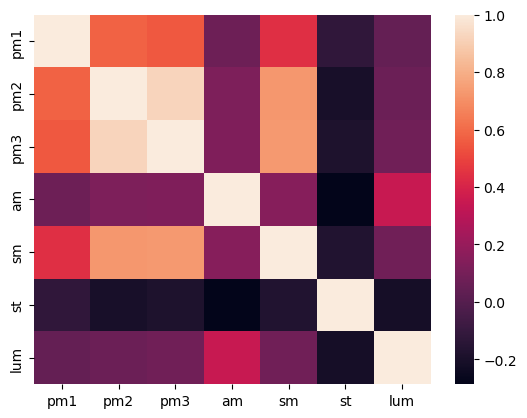

In [39]:
sns.heatmap(df_1.corr())

In [40]:
df_1.head()

,ttime,pm1,pm2,pm3,am,sm,st,lum
0,2022-07-18 15:42:55,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0
1,2022-07-18 15:47:55,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0
2,2022-07-18 15:52:55,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0
3,2022-07-18 15:57:55,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0
4,2022-07-18 16:02:55,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0


In [49]:
df_1['Month']=[x.split()[0].split('-')[1] for x in df_1['ttime']]
df_2['Month']=[x.split()[0].split('-')[1] for x in df_2['ttime']]


<AxesSubplot: ylabel='sm'>

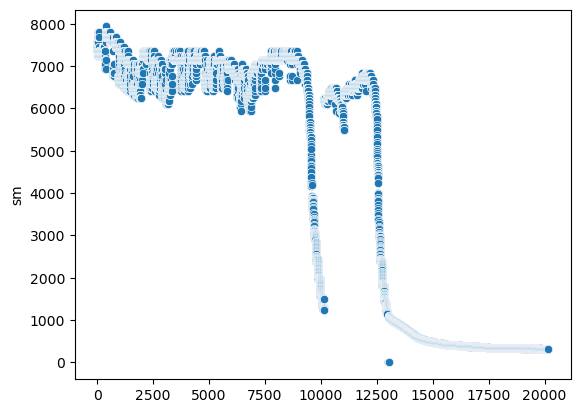

In [52]:
sns.scatterplot(df_2['sm'])

<AxesSubplot: ylabel='sm'>

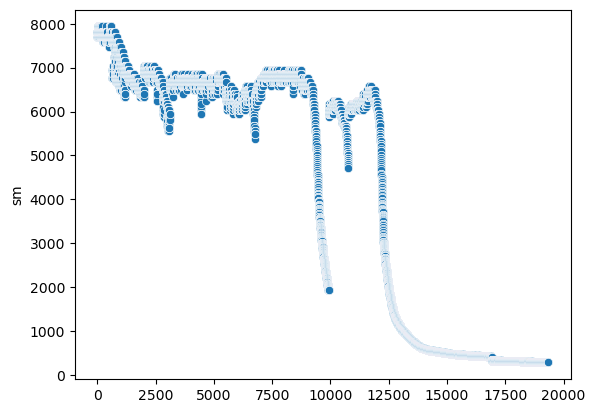

In [54]:
sns.scatterplot(df_1['sm'])

In [60]:
df_1.groupby(df_1['Month']).mean()['sm']

Month
01     365.489904
02     310.890165
03     292.201774
07    7076.234512
08    6502.291377
09    6046.203710
10    5628.246286
11     856.113488
12     469.201699
Name: sm, dtype: float64

In [62]:
df_2.groupby(df_1['Month']).mean()['sm']

Month
01     371.802338
02     341.751615
03     333.126386
07    7103.205245
08    6865.977747
09    6448.472673
10    6013.469116
11    1055.983256
12     437.789809
Name: sm, dtype: float64

<AxesSubplot: >

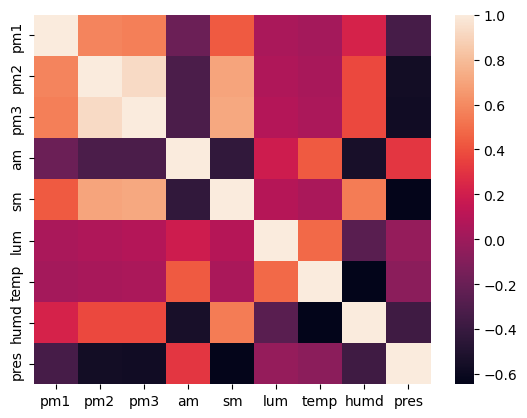

In [64]:
sns.heatmap(df_2.corr())



In [ ]:
sns.pairplot(df_11)

In [ ]:
# Trying the model
